In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Normal_Equations(Ndata, pwindow, y_signal):
  cov = np.zeros((pwindow+1))
  cov_mat = np.zeros((pwindow, pwindow))
  cov_vec = np.zeros((pwindow))

  for i in range(pwindow+1):
    for k in range(Ndata):
      cov[i] += y_signal[k-i]*y_signal[k]

  for i in range(pwindow):
    for j in range(pwindow):
      cov_mat[i, j] = cov[np.abs(j-i)]
    cov_vec[i] = cov[i+1]

  return cov_mat, cov_vec

def PredictiveCoeffs(cov_mat, cov_vec):
  return -np.dot(np.linalg.inv(cov_mat), cov_vec)

def Prediction(Npred, pwindow, coeffs, y_signal):
  ypred = list(y_signal[-pwindow:])
  for i in range(Npred):
    pred = 0
    for i in range(1, pwindow+1):
      pred += -coeffs[i-1]*ypred[len(ypred)-i]
    ypred.append(pred)

  return np.array(ypred)

340


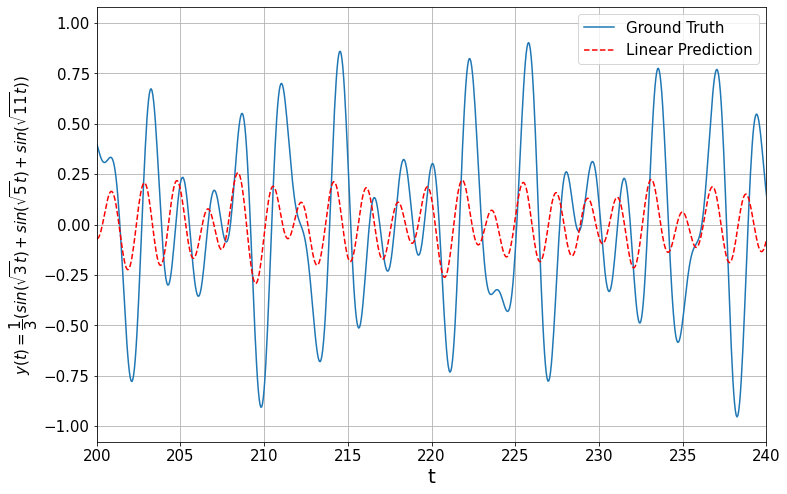

In [39]:
tmax = 100

dt = 0.05

ttr = np.arange(0, tmax, dt)

ytr = (np.sin(np.sqrt(11)*ttr) + np.sin(np.sqrt(5)*ttr) + np.sin(np.sqrt(3)*ttr))/3

p = 10*int(np.sqrt(3)/dt)

print(p)

covMatrix, covVector = Normal_Equations(len(ytr), p, ytr)
coeffs = PredictiveCoeffs(covMatrix, covVector)

Npreds = int(200/0.05)

ypred = Prediction(Npreds, p, coeffs, ytr)

tpred = np.arange(tmax, tmax+Npreds*0.05, 0.05)

ygd = (np.sin(np.sqrt(11)*tpred) + np.sin(np.sqrt(5)*tpred) + np.sin(np.sqrt(3)*tpred))/3
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize = (12, 8))

    #plt.plot(ttr, ytr)
    plt.plot(tpred, ygd, label = 'Ground Truth')
    plt.plot(tpred, ypred[-Npreds:], linestyle = 'dashed', color = 'red', label = 'Linear Prediction')
    plt.xlabel('t', fontsize = 20)
    plt.ylabel(r'$y(t) = \dfrac{1}{3}(sin(\sqrt{3}t) + sin(\sqrt{5}t) + sin(\sqrt{11}t))$', fontsize = 15)

    plt.tick_params(labelsize = 15)

    plt.grid(visible = True)

    plt.legend(fontsize = 15)
    plt.xlim(200, 240)

    plt.savefig('fig2_5.png', format = 'png', bbox_inches = 'tight')

plt.show()

In [25]:
Npreds = int(200/0.05)

tpred = np.arange(tmax, tmax+Npreds*0.05, 0.05)
ygd = (np.sin(np.sqrt(11)*tpred) + np.sin(np.sqrt(5)*tpred) + np.sin(np.sqrt(3)*tpred))/3

Ys = []

MSEs = []
MSEtrs = []
Ps = [5*int(np.sqrt(3)/dt), 10*int(np.sqrt(3)/dt), 20*int(np.sqrt(3)/dt), 40*int(np.sqrt(3)/dt)]

for i in range(len(Ps)):

  print(Ps[i])

  covMatrix, covVector = Normal_Equations(len(ytr), Ps[i], ytr)
  coeffs = PredictiveCoeffs(covMatrix, covVector)

  ypred = Prediction(Npreds, Ps[i], coeffs, ytr)

  ytrpred = Prediction(len(ytr)-Ps[i], Ps[i], coeffs, ytr[:Ps[i]])

  mse = np.mean((ygd - ypred[-Npreds:])**2)

  mse_tr = np.mean((ytr[-(len(ytr)-Ps[i])] - ytrpred)**2)

  MSEs.append(mse)
  MSEtrs.append(mse_tr)
  Ys.append(ypred)

print(np.min(MSEs))


170
340
680
1360
0.10791226551465576


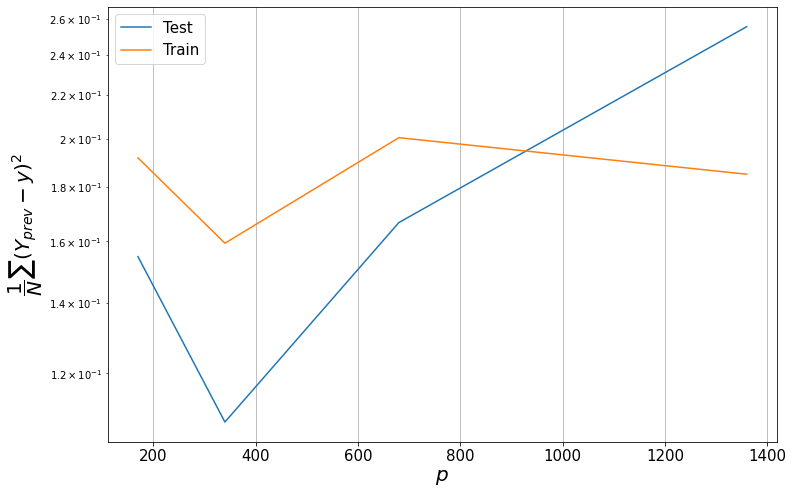

In [30]:
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
  fig = plt.figure(figsize = (12, 8))

  plt.semilogy(Ps, MSEs, label = 'Test')
  plt.semilogy(Ps, MSEtrs, label = 'Train')

  plt.xlabel(r'$p$', fontsize = 20)
  plt.ylabel(r'$\dfrac{1}{N}\sum(Y_{prev}-y)^2$', fontsize = 20)
  plt.tick_params(labelsize = 15)

  plt.grid(visible = True)

  plt.legend(fontsize = 15)

  plt.savefig('fig2_1.png', format = 'png', bbox_inches = 'tight')

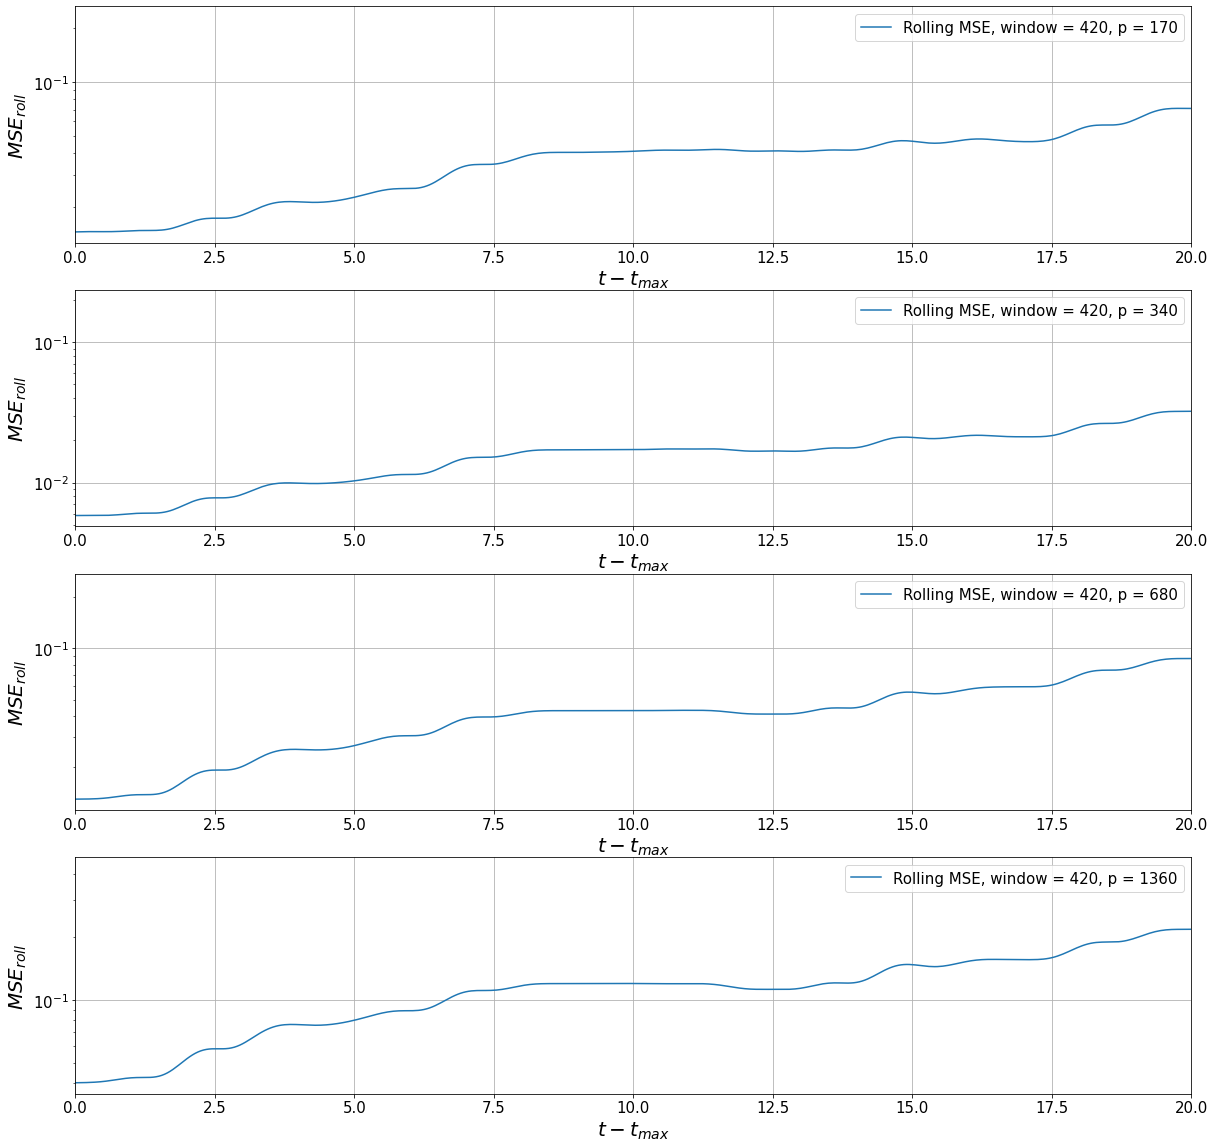

In [42]:
Nwindow = 420#21

roll_means = []
roll_mean_times = []

with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(len(Ps), figsize = (20, 20))

    for i in range(len(Ps)):
        Ys_ = np.array(Ys[i])
        MSE_roll = (Ys_[-(len(Ys_) - Ps[i]):]-ygd)**2


        rolling_mean = np.convolve(MSE_roll, np.ones(Nwindow)/Nwindow, mode='valid')

        roll_means.append(rolling_mean)

        future_time = np.arange(0, len(rolling_mean)*dt, dt)
        roll_mean_times.append(future_time)

        ax[i].semilogy(future_time, rolling_mean, label = f'Rolling MSE, window = {Nwindow}, p = {Ps[i]}')
        ax[i].set_xlim(0, 20)

        ax[i].set_xlabel(r'$t-t_{max}$', fontsize = 20)
        ax[i].set_ylabel(r'$MSE_{roll}$', fontsize = 20)

        ax[i].tick_params(labelsize = 15)

        ax[i].grid(visible = True)

        ax[i].legend(fontsize = 15)
        plt.savefig('fig2_7.png', format = 'png', bbox_inches = 'tight')
        #ax[i].set_xlim(0, 600)